# Comparison of Financial Models for Stock Price Prediction
1.ARIMA<br>
2.Stochastic process-geometric Brownian motion <br>
3.Artificial Neural Network <br>

<h2> ARIMA(Auto-Regressive Integrated Moving Average)</h2>
A time series Yt is said to follow an ARIMA(p,d.q) model if the dth difference Wt = (delta)^d*Yt is a stationary ARMA(p,q) process <br>
 Wt = φ1*Wt−1 + φ2*Wt−2 + . . . + φp*Wt−p + et + θ1*et−1 + θ2*et−2 + . . . + θq*et−q 

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.ticker as ticker
from pandas import DataFrame
from statsmodels.graphics.api import qqplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


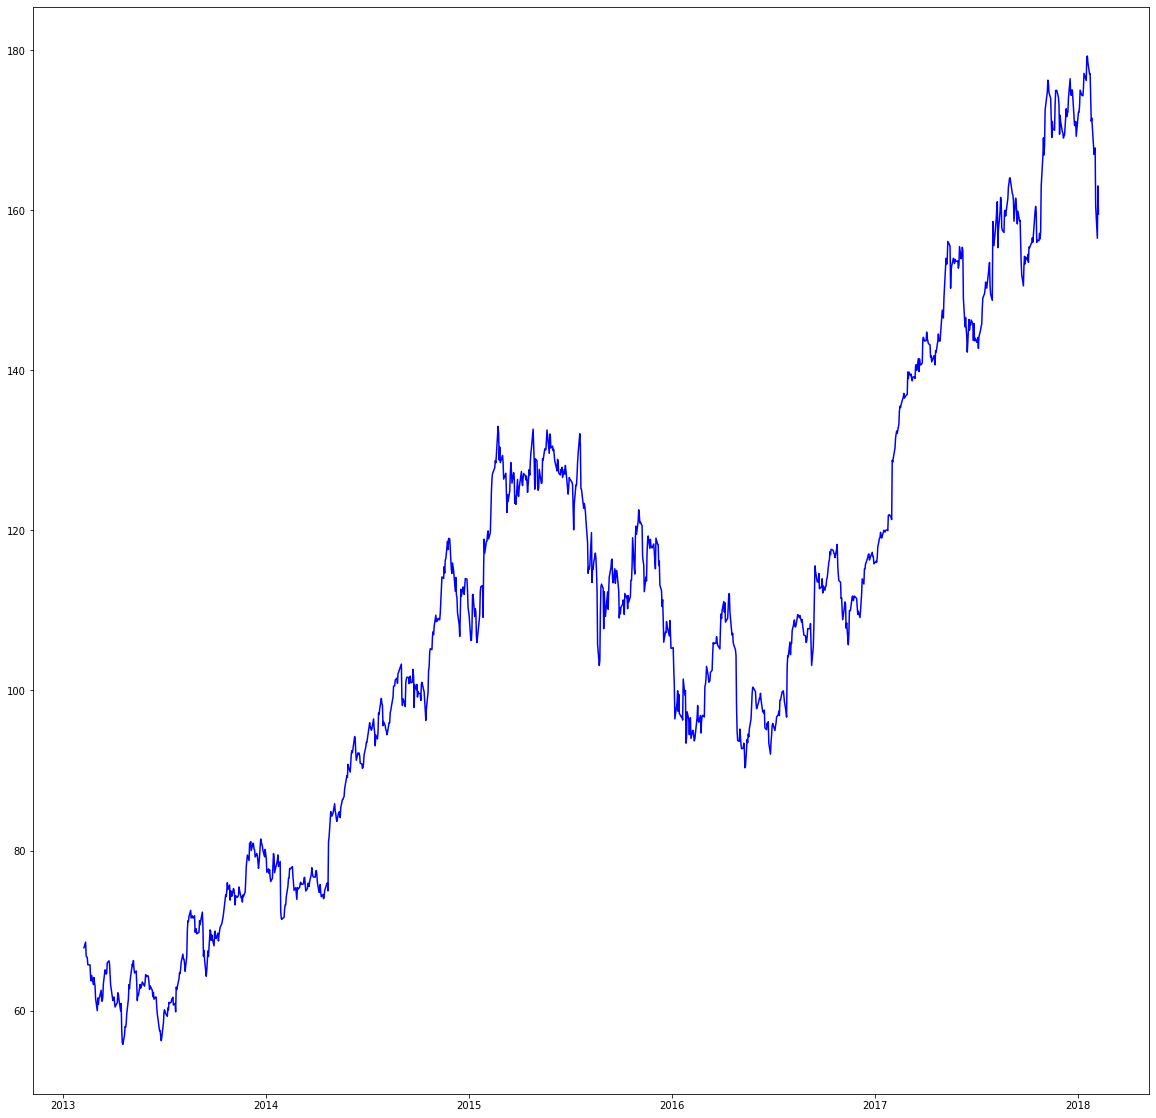

In [123]:
Apple = pd.read_csv("AAPL_data.csv")
# Apple.head
date_time = pd.to_datetime(Apple['date'])
plt.figure(figsize=(20,20))
plt.plot( date_time,Apple['close'],color = 'b')
plt.show()

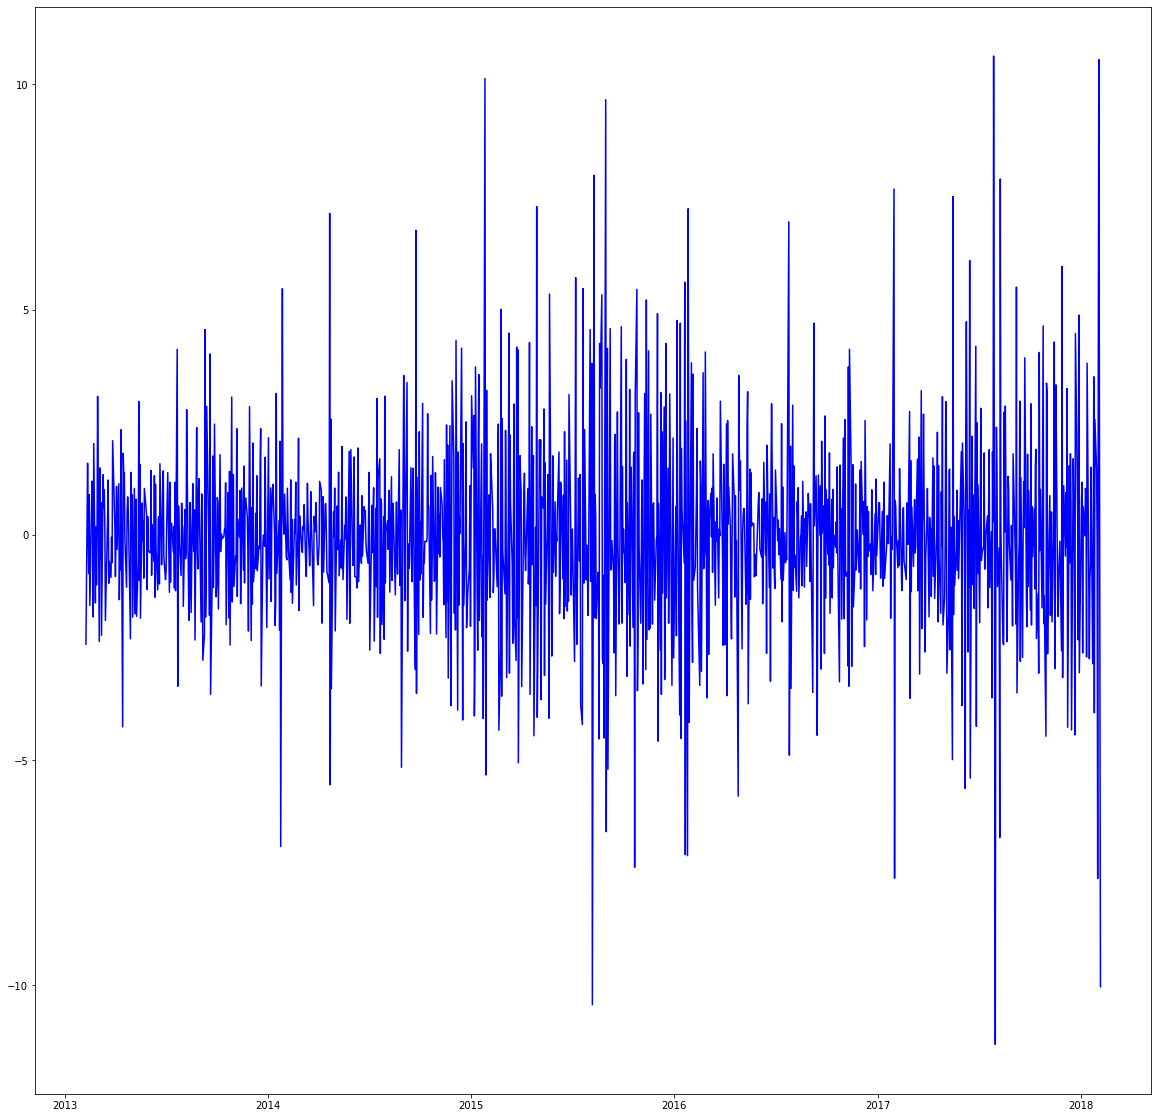

In [124]:
# Yt = np.log(Apple['close'])
Yt = Apple['close']
# print(len(Yt))
wt = []
for i in range(2,len(Yt)):
    wt.append(Yt[i] - 2*Yt[i-1] + Yt[i-2])
plt.figure(figsize=(20,20))
plt.plot( date_time[: len(wt)],wt,color = 'b')
plt.show()
# print(len(wt))

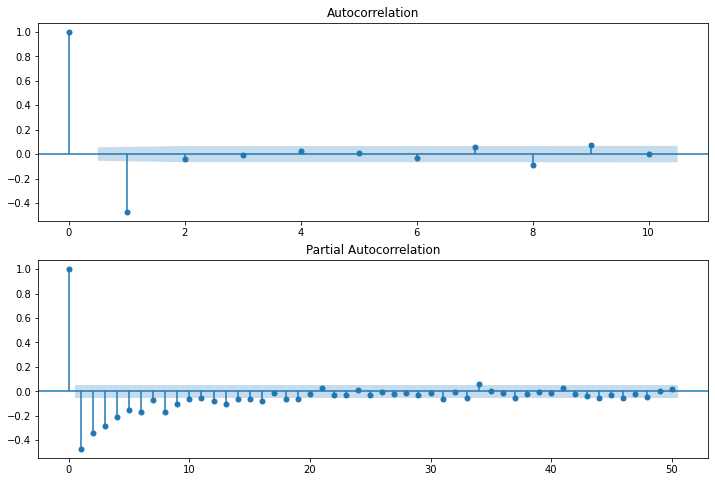

In [125]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(wt, lags=10, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(wt, lags=50, ax=ax2)

In [169]:
X = Apple['close']
size = int(len(X) * 0.66)
train = X[0:size]
test = X[size:len(X)]
l = len(test)
history = [x for x in train]
predictions = list()
# for i in range()
print(history[-1])
for t in range(size,len(X)):
	model = ARIMA(history, order=(1,2,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = math.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
i = 0
Temp = np.zeros(len(test))
for t in test:
	Temp[i] = t
	i += 1

99.62
predicted=101.218839, expected=100.410000
predicted=101.650769, expected=100.350000
predicted=100.701723, expected=99.860000
predicted=99.578203, expected=98.460000
predicted=97.500502, expected=97.720000
predicted=96.660480, expected=97.920000
predicted=97.665131, expected=98.630000
predicted=99.093330, expected=99.030000
predicted=99.579939, expected=98.940000
predicted=99.086976, expected=99.650000
predicted=99.973043, expected=98.830000
predicted=98.750423, expected=97.340000
predicted=96.173859, expected=97.460000
predicted=96.801408, expected=97.140000
predicted=97.032721, expected=97.550000
predicted=97.607033, expected=95.330000
predicted=94.382790, expected=95.100000
predicted=93.905957, expected=95.910000
predicted=96.217261, expected=95.550000
predicted=95.755794, expected=96.100000
predicted=96.209842, expected=93.400000
predicted=92.274157, expected=92.040000
predicted=90.031227, expected=93.590000
predicted=93.734709, expected=94.400000
predicted=95.566988, expected

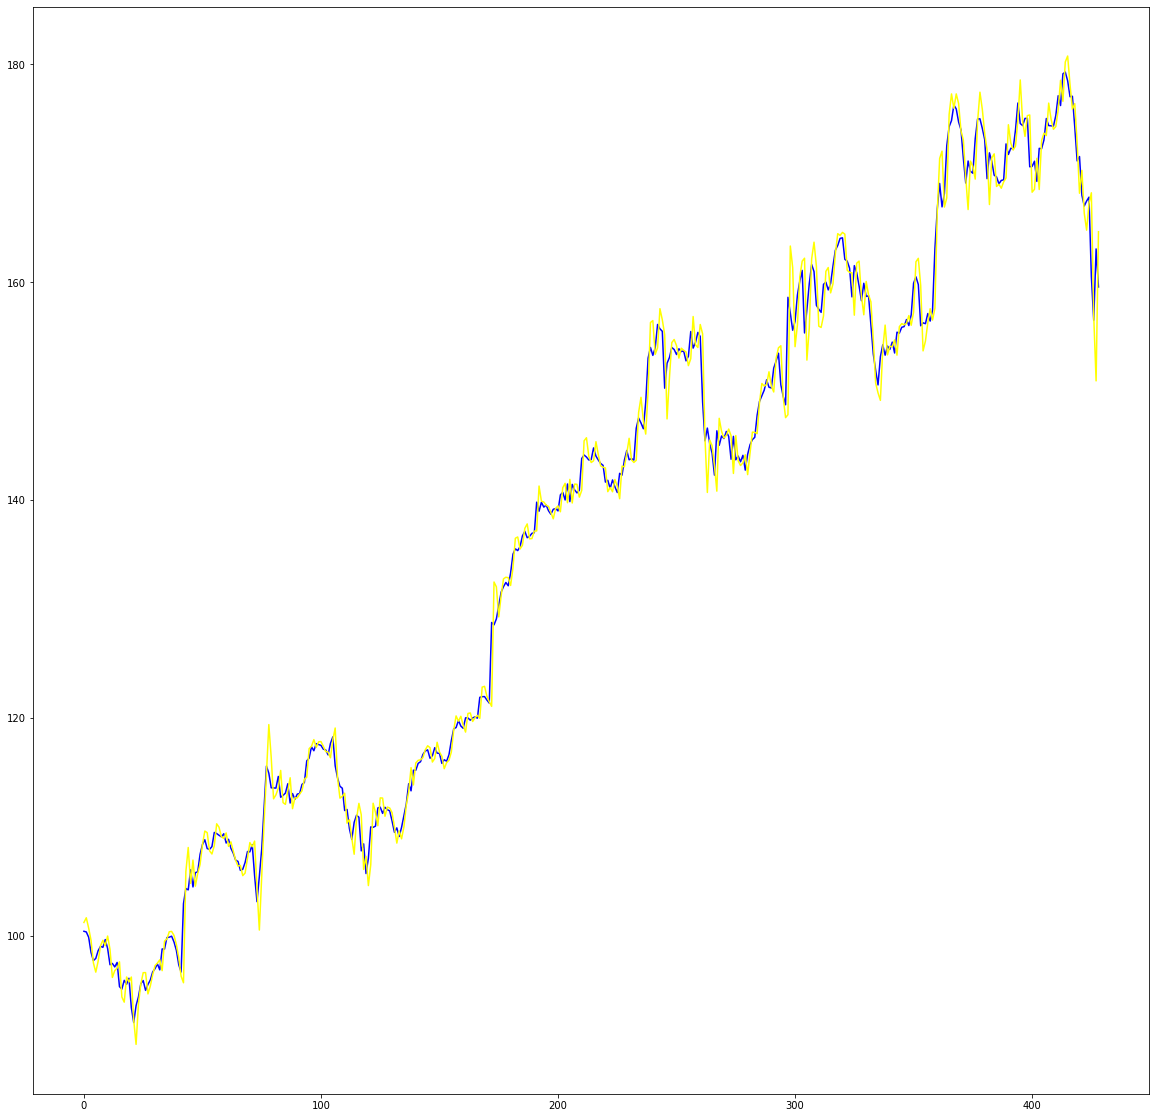

In [181]:
plt.figure(figsize=(20,20))
plt.plot(Temp, color = 'blue')
plt.plot(predictions,color='yellow')
plt.show()

# Geometric Brownian Motion Model
S(ti+1) = S(ti) exp((μ −σ/2)+ σZi+1)

In [3]:
SnP = pd.read_csv('Data.csv')
print(SnP)



            Date    Close     Open     High      Low   Output
0     02/24/2022  4288.70  4155.77  4294.73  4114.65  4221.51
1     02/23/2022  4225.50  4324.93  4341.51  4221.51  4267.11
2     02/22/2022  4304.76  4332.74  4362.12  4267.11  4327.22
3     02/18/2022  4348.87  4384.57  4394.60  4327.22  4373.81
4     02/17/2022  4380.26  4456.06  4456.06  4373.81  4429.68
...          ...      ...      ...      ...      ...      ...
2545  03/05/2012  1364.33  1369.59  1369.59  1359.13  1366.42
2546  03/02/2012  1369.63  1374.09  1374.53  1366.42  1365.90
2547  03/01/2012  1374.09  1365.90  1376.17  1365.90  1363.81
2548  02/29/2012  1365.68  1372.20  1378.04  1363.81  1365.97
2549  02/28/2012  1372.18  1367.56  1373.09  1365.97  1354.92

[2550 rows x 6 columns]


# Artificial Neural Network

In [2]:
import tensorflow as tf
from tensorflow import keras

In [25]:
Average = SnP['Open'] + SnP['Close'] + SnP['High'] + SnP['Low']
Average = Average/4
Returns = [0]
Adjusted_Close_Price = SnP['Close']
for i in range(1,len(Adjusted_Close_Price)):
    Returns.append(Adjusted_Close_Price[i]/Adjusted_Close_Price[i-1])
Returns = np.array(Returns).reshape(-1,1)

In [68]:
# Normalizing values
Returns = Returns/(max(Returns) + 1)
Average = Average/(max(Average) +1)
SnP['Open'] = SnP['Open']/max(SnP['Open'] + 1)
SnP['Close'] = SnP['Close']/max(SnP['Close']+1)
SnP['High'] = SnP['High']/max(SnP['High']+1)
SnP['Low'] = SnP['Low']/max(SnP['Low']+1)

In [69]:
x_train = [SnP['Close'][: 1275] , SnP['Open'][: 1275], SnP['High'][: 1275], SnP['Low'][: 1275]]
x_train = np.array(x_train).T
y_train = [SnP['Close'][1 : 1276]]
y_train = np.array(y_train).T
# print(len(x_train), len(y_train))
x_test = [SnP['Close'][1275 : 2551] , SnP['Open'][1275 : 2551], SnP['High'][1275 : 2551], SnP['Low'][1275 : 2551]]
y_test = [SnP['Close'][1276 :]]
y_test = np.array(y_test).T
x_test = np.array(x_test).T
print(x_train)
print(y_train)

[[0.44705998 0.43248635 0.445639   0.43039912]
 [0.44047192 0.45009064 0.45049309 0.44157685]
 [0.44873409 0.45090342 0.45263167 0.44634668]
 ...
 [0.2389796  0.23876316 0.23826116 0.23938816]
 [0.23948622 0.23816581 0.23848218 0.23931599]
 [0.23775894 0.23693259 0.2369942  0.2376183 ]]
[[0.44047192]
 [0.44873409]
 [0.45333218]
 ...
 [0.23948622]
 [0.23775894]
 [0.23762342]]


In [73]:
# train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
# test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 100

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [65]:
model = keras.Sequential([
    keras.layers.InputLayer(4),  # input layer (1)
    keras.layers.Dense(15, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(1) # output layer (3)
])

In [82]:
model.compile(optimizer='adam',
              loss='mse')

In [83]:
model.fit(x_train, y_train, epochs=10)  

Epoch 1/10
40/40 [==============================] - 0s 1ms/step - loss: 4.5985e-05
Epoch 2/10
40/40 [==============================] - 0s 3ms/step - loss: 5.8093e-06
Epoch 3/10
40/40 [==============================] - 0s 3ms/step - loss: 4.2369e-06
Epoch 4/10
40/40 [==============================] - 0s 4ms/step - loss: 4.1898e-06
Epoch 5/10
40/40 [==============================] - 0s 2ms/step - loss: 4.0822e-06
Epoch 6/10
40/40 [==============================] - 0s 2ms/step - loss: 4.7812e-06
Epoch 7/10
40/40 [==============================] - 0s 2ms/step - loss: 4.2380e-06
Epoch 8/10
40/40 [==============================] - 0s 2ms/step - loss: 4.1724e-06
Epoch 9/10
40/40 [==============================] - 0s 2ms/step - loss: 4.1973e-06
Epoch 10/10
40/40 [==============================] - 0s 2ms/step - loss: 4.5915e-06


In [88]:
model.evaluate(x_test,y_test, verbose=1)
predictions = model.predict(x_test)
print(y_test)
print(predictions)

40/40 [==============================] - 0s 1ms/step - loss: 0.0011
[[0.23755254]
 [0.23776415]
 [0.23920164]
 ...
 [0.14236036]
 [0.14303793]
 [0.14255946]]
[[0.23885979]
 [0.23761714]
 [0.23883632]
 ...
 [0.14309548]
 [0.1437194 ]
 [0.14313102]]
